<u>Travail à faire :</u>:

Dans ce lab, nous allons appliquer le clustering sur une population d'employés.

Nous allons utiliser les techniques de Kmeans et clustering hierarchique.

<h3>1. Création de la population</h3>

In [11]:
# Créer la population d'employés comme étant une matrice numpy
# Les employés sont : 
# [[25, 900],
# [29, 1200.75],
# [31, 1000],
# [45, 2300],
# [50, 2500],
# [48, 2100],
# [48, 600],
# [50, 750]]
# Chaque employé représente une ligne de la matrice
# Les colonnes sont les caractéristiques d'employés : age et salaire

# import numpy
import numpy as np

# Créer la matrice d'employés
X = np.array([[25, 900],
            [29, 1200.75],
            [31, 1000],
            [45, 2300],
            [50, 2500],
            [48, 2100],
            [48, 600],
            [50, 750]])

In [12]:
X

array([[  25.  ,  900.  ],
       [  29.  , 1200.75],
       [  31.  , 1000.  ],
       [  45.  , 2300.  ],
       [  50.  , 2500.  ],
       [  48.  , 2100.  ],
       [  48.  ,  600.  ],
       [  50.  ,  750.  ]])

<h3>2. Apprentissage de modèle Kmeans</h3>

In [20]:
# Importer la classe Kmeans de module sklearn.cluster
from sklearn.cluster import KMeans

# Créer une instance km de Kmeans et lui passer les hyperparamètres :
# n_clusters : nombre de clusters. Donner la valeur 2
# random_state : permet de rendre le choix aléatoire déterministe. Donner la valeur 0
km = KMeans(n_clusters=2, random_state=0)

In [21]:
# Afficher le nombre de clusters
# Il s'agit de l'attribut n_clusters de l'instance km
km.n_clusters

2

In [22]:
# Lancer l'apprentissage en appelant la fonction fit() de l'instance km
# Lui passer comme argument la matrice de la population X
km.fit(X)

c:\Users\Polytech INTL\OneDrive - POLYTECH INTL\Desktop\LA3_2023\cours_ML\venv_ML\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

In [23]:
# Afficher les clusters
# Il s'agit de l'attribut cluster_centers_ de l'instance km
km.cluster_centers_

array([[  47.66666667, 2300.        ],
       [  36.6       ,  890.15      ]])

<h3>3. Déterminer les clusters</h3>

In [24]:
# Déterminer les clusters auxquels appartiennent les points des données (les employees)
# Appeler la fonction predict() et lui passer la matrice dezs employees
# Cette fonction retourne les labels des clusters (0 ou 1) auxquels apprtiennent les employees
labels=km.predict(X)

In [25]:
# Afficher les labels des clusters
labels

array([1, 1, 1, 0, 0, 0, 1, 1])

In [30]:
# Répartir la, population en clusters en se basant sur les les labels
cluster0=X[labels==0,:]
cluster1=X[labels==1,:]

In [31]:
cluster0

array([[  45., 2300.],
       [  50., 2500.],
       [  48., 2100.]])

In [32]:
cluster1

array([[  25.  ,  900.  ],
       [  29.  , 1200.75],
       [  31.  , 1000.  ],
       [  48.  ,  600.  ],
       [  50.  ,  750.  ]])

<h3>4. Prédiction de label de cluster pour un nouvel employee</h3>

In [40]:
# Soit un nouvel employé [48, 900]
# On veut déterminer à quel cluster il appartient ?
new_emp=np.array([[48, 900]])
label=km.predict(new_emp)
label

array([1])

<h3>5. Visualisation</h3>

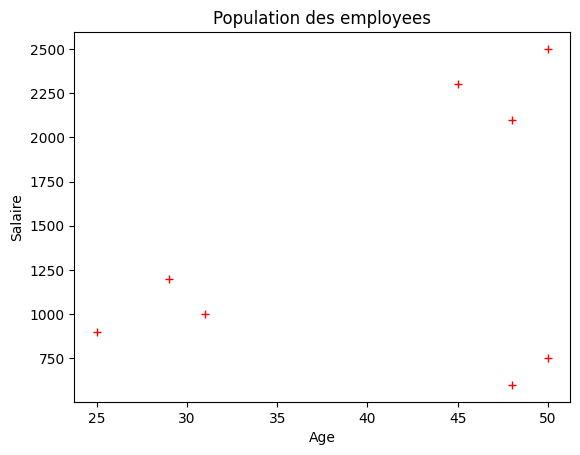

In [36]:
# Importer le module matplotlib.pyplot
import matplotlib.pyplot as plt

# Afficher les points des données (les employees) dans un figure
# L'axe des x est l'age des employees
# L'axe des y est le salaire des employees
# Les points sont visualisés comme symbole + et colorés en rouge
plt.plot(X[:,0],X[:,1],'r+')
plt.xlabel('Age')
plt.ylabel('Salaire')
plt.title('Population des employees')
plt.show()

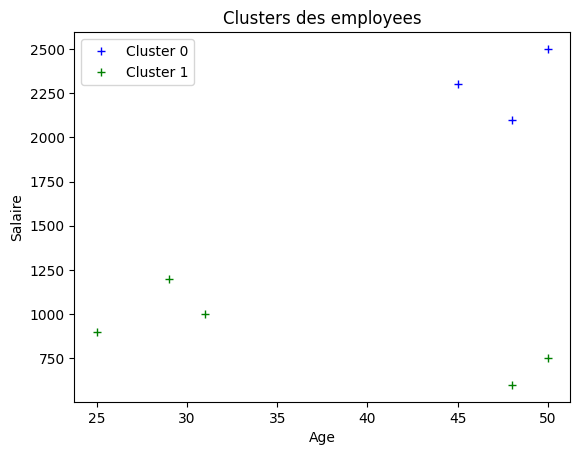

In [37]:
# Afficher les clusters des employees dans un figure
# Les points de cluster 0 sont visualisés comme symbole + et colorés en blue
# Les points de cluster 1 sont visualisés comme symbole + et colorés en vert
# Attribuer un label de légende à chaque cluster
plt.plot(cluster0 [:,0],cluster0[:,1],'b+', label='Cluster 0')
plt.plot(cluster1 [:,0],cluster1[:,1],'g+', label='Cluster 1')
plt.xlabel('Age')
plt.ylabel('Salaire')
plt.legend()
plt.title('Clusters des employees')
plt.show()

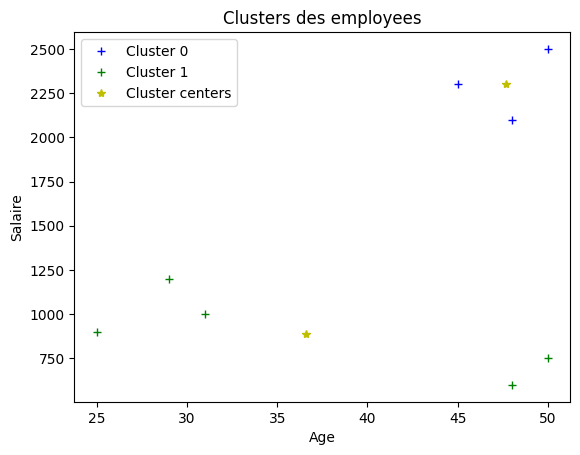

In [38]:
# Afficher la même figure
# Afficher dedans les centres des clusters avec symbole * et colorés en jaune

plt.plot(cluster0 [:,0],cluster0[:,1],'b+', label='Cluster 0')
plt.plot(cluster1 [:,0],cluster1[:,1],'g+', label='Cluster 1')
plt.plot(km.cluster_centers_ [:,0],km.cluster_centers_[:,1],'y*', label='Cluster centers')
plt.xlabel('Age')
plt.ylabel('Salaire')
plt.legend()
plt.title('Clusters des employees')
plt.show()

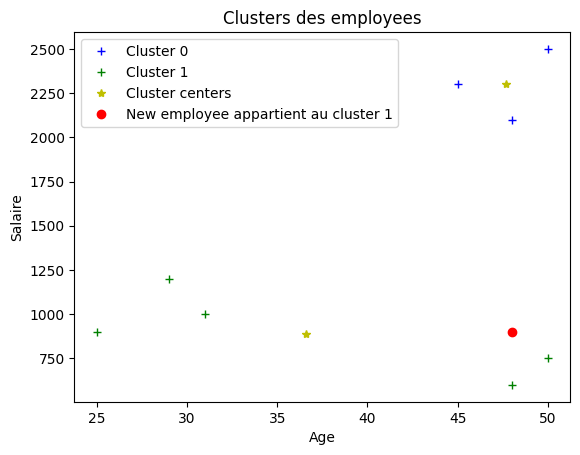

In [43]:
# Dans la même figure de tout à l'heure
# Afficher le nouvel employé avec le symbole o et coleur rouge
# Indiquer dans le label de la légende à quel cluster il apprtient

plt.plot(cluster0 [:,0],cluster0[:,1],'b+', label='Cluster 0')
plt.plot(cluster1 [:,0],cluster1[:,1],'g+', label='Cluster 1')
plt.plot(km.cluster_centers_ [:,0],km.cluster_centers_[:,1],'y*', label='Cluster centers')
plt.plot(new_emp[:,0],new_emp[:,1],'ro', label='New employee appartient au cluster '+str(label[0]))
plt.xlabel('Age')
plt.ylabel('Salaire')
plt.legend()
plt.title('Clusters des employees')
plt.show()

<h3>6. Exercice :</h3>

<u>Travail demandé:</u>
Refaire le cmême lustering ci-dessous mais avec nombre de clusters=3

Vous allez copier coller tout le code et l'adapter